<a href="https://colab.research.google.com/github/FKz11/NLP/blob/main/lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson-2

# Инструменты для работы с языком 

## Задача: классификация твитов по тональности

У нас есть датасет из твитов, про каждый указано, как он эмоционально окрашен: положительно или отрицательно. Задача: предсказывать эмоциональную окраску.

Скачиваем куски датасета ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv).

In [1]:
# если у вас линукс / мак / collab или ещё какая-то среда, в которой работает wget, можно так:
!wget https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv
!wget https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv

--2022-08-25 15:55:15--  https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fnpq3z4bcnoktiv/positive.csv [following]
--2022-08-25 15:55:16--  https://www.dropbox.com/s/raw/fnpq3z4bcnoktiv/positive.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc501c02d06a135326011c1aa9d4.dl.dropboxusercontent.com/cd/0/inline/BrtrtZo2fmqIo3gKU-96TAKbvOOkkt1ID4YNgw2eYLrYr_yBbkaKs_3x1_VmoeaaYrHrT5oEF6dDrA1woiruuZri5yfswm5K5hTZ6GdUyspCO2EgGwmJyeRZ2cc7MSupz_mfjG2cAPs4o_1V3ZqYTi77DhW-9ltErE0ScrF2-hKBPA/file# [following]
--2022-08-25 15:55:17--  https://uc501c02d06a135326011c1aa9d4.dl.dropboxusercontent.com/cd/0/inline/BrtrtZo2fmqIo3gKU-96TAKbvOOkkt1ID4YNgw2eYLrYr_yBbkaKs_3x1_VmoeaaYrHr

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv('positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = ['positive'] * len(positive)
negative = pd.read_csv('negative.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = ['negative'] * len(negative)
df = positive.append(negative)

In [4]:
df.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

## Baseline: классификация необработанных n-грамм

### Векторизаторы

In [6]:
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer

Что такое n-граммы:

In [7]:
from nltk import ngrams

In [9]:
sent = 'Если б мне платили каждый раз'.split()
list(ngrams(sent, 1)) # униграммы

[('Если',), ('б',), ('мне',), ('платили',), ('каждый',), ('раз',)]

In [10]:
list(ngrams(sent, 2)) # биграммы

[('Если', 'б'),
 ('б', 'мне'),
 ('мне', 'платили'),
 ('платили', 'каждый'),
 ('каждый', 'раз')]

In [11]:
list(ngrams(sent, 3)) # триграммы

[('Если', 'б', 'мне'),
 ('б', 'мне', 'платили'),
 ('мне', 'платили', 'каждый'),
 ('платили', 'каждый', 'раз')]

In [12]:
list(ngrams(sent, 5)) # ... пентаграммы?

[('Если', 'б', 'мне', 'платили', 'каждый'),
 ('б', 'мне', 'платили', 'каждый', 'раз')]

Самый простой способ извлечь фичи из текстовых данных -- векторизаторы: `CountVectorizer` и `TfidfVectorizer`

Объект `CountVectorizer` делает простую вещь:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности `n`, где `n` -- количество слов или n-грам во всём корпусе
* заполняет каждый i-тый элемент количеством вхождений слова в данный документ

In [30]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train) # bow -- bag of words (мешок слов)

ngram_range отвечает за то, какие n-граммы мы используем в качестве фичей:<br/>
ngram_range=(1, 1) -- униграммы<br/>
ngram_range=(3, 3) -- триграммы<br/>
ngram_range=(1, 3) -- униграммы, биграммы и триграммы.

В vec.vocabulary_ лежит словарь: мэппинг слов к их индексам:

In [16]:
list(vec.vocabulary_.items())[:10]

[('через', 236159),
 ('пару', 178620),
 ('недель', 165350),
 ('моя', 160016),
 ('хмесячная', 233105),
 ('командировка', 146224),
 ('закончится', 134105),
 ('армия', 100998),
 ('моей', 159026),
 ('жизни', 131278)]

In [31]:
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [32]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.76      0.76      0.76     27916
    positive       0.77      0.77      0.77     28793

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709



Попробуем сделать то же самое для триграмм:

In [27]:
vec = CountVectorizer(ngram_range=(3, 3))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.47      0.71      0.56     18192
    positive       0.82      0.61      0.70     38517

    accuracy                           0.65     56709
   macro avg       0.64      0.66      0.63     56709
weighted avg       0.71      0.65      0.66     56709



(как вы думаете, почему в результатах теперь такой разброс по сравнению с униграммами?)

# Ответ:

In [25]:
bow._shape

(170125, 1327056)

In [29]:
pred = clf.predict(vec.transform(x_train))
print(classification_report(pred, y_train))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     84075
    positive       1.00      1.00      1.00     86050

    accuracy                           1.00    170125
   macro avg       1.00      1.00      1.00    170125
weighted avg       1.00      1.00      1.00    170125



С ростом n-грамм, размер словаря увеличился, вероятность встретить определённое сочетание из трёх слов меньше, чем вероятность встретить одно какое-то слово, из-за этого увеличивается разряженность дынных и следовательно модель начинает переобучаться, становится менее устойчивая к новым данным.

Так же вероятно, радость (positive) вызывает похожий контекст (любовь, друзья, путешествие) и похожие устойчивые словосочетания (я люблю тебя), а для грусти (negative) контекст часто разный, всякие нестандартные ситуации, когда всё должно было быть как обычно, но так не было, нагрубил таксист, непробилась покупка и т.д. И если униграмы ещё находили по похожим словам какой-то похожий контекст, злость, грубость и т.д. То у триграмм, это уже не получается.

## TF-IDF векторизация

`TfidfVectorizer` делает то же, что и `CountVectorizer`, но в качестве значений – tf-idf каждого слова.

Как считается tf-idf:

TF (term frequency) – относительная частотность слова в документе:
$$ TF(t,d) = \frac{n_t}{\sum_k n_k} $$

`t` -- слово (term), `d` -- документ, $n_t$ -- количество вхождений слова, $n_k$ -- количество вхождений остальных слов

IDF (inverse document frequency) – обратная частота документов, в которых есть это слово:
$$ IDF(t, D) = \mbox{log} \frac{|D|}{|{d : t \in d}|} $$

`t` -- слово (term), `D` -- коллекция документов

Перемножаем их:
$$TFIDF_(t,d,D) = TF(t,d) \times IDF(i, D)$$

Сакральный смысл – если слово часто встречается в одном документе, но в целом по корпусу встречается в небольшом 
количестве документов, у него высокий TF-IDF.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.74      0.76      0.75     26788
    positive       0.78      0.75      0.77     29921

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709



В этот раз получилось хуже :( Вернёмся к `CountVectorizer`.

## PMI

Можно оценить взаимосвязь слов в корпусе и понять, какие биграммы наиболее часто встречаются в тексте. Для этого можно использовать метрику PMI (Pointwise Mutual Information) - поточечная взаимная информация. Метрика PMI для двух слов вычисляется по формуле:

$$pmi(x; y) = log \frac{p(x,y)}{p(x)p(y)} $$

Здесь p(y|x) - вероятность встретить слово $y$ после $x$, $p(y)$ - вероятность встретить слово $y$.

Оценим важность биграмм в нашем обучающем корпусе.

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
from nltk import collocations 
nltk.download('genesis')

bigram_measures = collocations.BigramAssocMeasures()
# bigram_finder.apply_freq_filter(5)
bigram_finder = collocations.BigramCollocationFinder.from_documents([nltk.word_tokenize(x) for x in x_train])
bigrams = bigram_finder.nbest(bigram_measures.pmi, 100)
print(bigrams)

[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!


[('+1239', '728'), ('+7', '495'), ('+Никита', '=полностью'), ('+СОННО', '+НЕ'), ('+живіт', 'болить.ну'), ('+погода', 'крутая='), (',Дела', 'рез'), (',как', 'додики'), ('-10,11', 'болсо'), ('-163', '-КРАСНЫЙ'), ('-165', '-СИНИЙ'), ('-53', 'dBm'), ('-800', 'нахууй'), ('-АХАХАХАХХАХАХАХАХАХХА', '-АХАХАХХАХАХАХАХАХ'), ('-Аха', 'спетросянил'), ('-ВСЕМ', 'СПОКОЙНЫХ'), ('-Весело', 'кншн:3'), ('-Восьмигрудый', 'трипи'), ('-Время', 'эмокора'), ('-Выздоравливай', 'педрилк'), ('-ГНИДОТА', '-Над'), ('-Д-Д-Д-Д-Д-Д-ДРОП', 'ЗЭ'), ('-ДЕТЕЙ', 'НАКРЫЛО'), ('-ДОВАЙТИ', 'АЛДСКУЛ'), ('-Дирол', 'Сенсес'), ('-Домашка', '-кл.час'), ('-ЖАРЕНЫЙ', 'КАРТОФЕЛЬ'), ('-ЖРАТЬ', 'БАРАНКИ'), ('-ЗАШЛА', 'ОДЕЛА'), ('-Защитано', '-ес'), ('-Зелено-карие', '-Киллджой'), ('-КРАСНЫЙ', '-ЧЕРНЫЕ'), ('-Керем', 'севгили'), ('-Киллджой', '-Котик'), ('-Корнейчук', 'затроллила'), ('-Маладец', '-Лол'), ('-Мамаааа', 'поправь'), ('-НА', 'РЕАЛЬНЫХ'), ('-НАЧИНАЕТ', 'БЕСИТЬ'), ('-Настя', 'Пармсон'), ('-ОЗВУЧИВАТЕЛЬ', 'МУЛЬТИКОВ'), ('-ОНИ',

Можно рассмотреть другие метрики оценки важности биграмм, например, метрику правдоподобия (подробнее про вычисление метрики можно посмотреть [здесь (пункт 5.3.4)](http://www.corpus.unam.mx/cursoenah/ManningSchutze_1999_FoundationsofStatisticalNaturalLanguageProcessing.pdf):

In [42]:
bigrams = bigram_finder.nbest(bigram_measures.likelihood_ratio, 100)
print(bigrams)

[('(', '('), ('RT', '@'), (')', ')'), ('http', ':'), ('!', '!'), (':', 'D'), ('у', 'меня'), (':', '('), (',', 'а'), (',', 'что'), (',', 'но'), (')', 'http'), ('*', '*'), ('у', 'нас'), (':', ')'), ('(', ','), (',', '('), (':', '-'), ('не', 'могу'), (',', ')'), ('?', '?'), (')', ','), (',', ':'), ('@', '('), (',', ','), (':', ','), ('(', ':'), ('@', ')'), ('@', ','), ('&', 'lt'), ('со', 'мной'), ('@', ':'), ('(', '@'), (':', ':'), ('новый', 'год'), ('gt', ';'), (';', ')'), ('не', 'знаю'), (',', '@'), (')', ':'), (':', '*'), ('У', 'меня'), ('а', 'я'), ('@', '@'), (',', 'когда'), ('потому', 'что'), ('сих', 'пор'), ('lt', ';'), ('&', 'gt'), ('у', 'тебя'), ('все', 'равно'), (';', '('), ('с', 'тобой'), (',', 'как'), ('в', 'школу'), ('(', 'http'), ('ничего', 'не'), (')', '@'), ('-', ')'), (',', 'я'), ('&', 'amp'), ('Доброе', 'утро'), ('Как', 'же'), (':', 'DD'), ('я', 'не'), ('не', '('), ('не', ')'), ('самом', 'деле'), ('до', 'сих'), (',', 'чтобы'), ('--', '--'), ('как', 'же'), ('(', '!'), (','

Как можно заметить, немаловажную роль в текстах занимает пунктуация.

## Стоп-слова и пунктуация

*Стоп-слова* -- это слова, которые часто встречаются практически в любом тексте и ничего интересного не говорят о конретном документе, то есть играют роль шума. Поэтому их принято убирать. По той же причине убирают и пунктуацию.

In [14]:
# у вас здесь, вероятно, выскочит ошибка и надо будет загрузить стоп слова (в тексте ошибки написано, как)
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
noise = stopwords.words('russian') + list(punctuation)

В векторизаторах за стоп-слова, логичным образом, отвечает аргумент `stop_words`.

In [47]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

    negative       0.80      0.76      0.78     29425
    positive       0.75      0.80      0.77     27284

    accuracy                           0.78     56709
   macro avg       0.78      0.78      0.78     56709
weighted avg       0.78      0.78      0.78     56709



Получилось чууть лучше. Что ещё можно сделать?

## Лемматизация

Лемматизация – это сведение разных форм одного слова к начальной форме – *лемме*. Почему это хорошо?
* Во-первых, мы хотим рассматривать как отдельную фичу каждое *слово*, а не каждую его отдельную форму.
* Во-вторых, некоторые стоп-слова стоят только в начальной форме, и без лематизации выкидываем мы только её.

Для русского есть два хороших лемматизатора: mystem и pymorphy:

### [Mystem](https://tech.yandex.ru/mystem/)
Как с ним работать:
* можно скачать mystem и запускать [из терминала с разными параметрами](https://tech.yandex.ru/mystem/doc/)
* [pymystem3](https://pythonhosted.org/pymystem3/pymystem3.html) - обертка для питона, работает медленнее, но это удобно

In [48]:
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /bin

--2022-08-25 10:25:02--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.245, 5.45.205.241, 5.45.205.242, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.245|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cachev2-spb02.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz?lid=122 [following]
--2022-08-25 10:25:03--  http://cachev2-spb02.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz?lid=122
Resolving cachev2-spb02.cdn.yandex.net (cachev2-spb02.cdn.yandex.net)... 37.140.137.4, 2a02:6b8:0:2221::304
Connecting to cachev2-spb02.cdn.yandex.net (cachev2-spb02.cdn.yandex.net)|37.140.137.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz’

mystem-3.0-linux3.1 100%[=====

In [49]:
from pymystem3 import Mystem
mystem_analyzer = Mystem()

Мы инициализировали Mystem c дефолтными параметрами. А вообще параметры есть такие:
* mystem_bin - путь к `mystem`, если их несколько
* grammar_info - нужна ли грамматическая информация или только леммы (по дефолту нужна)
* disambiguation - нужно ли снятие омонимии - дизамбигуация (по дефолту нужна)
* entire_input - нужно ли сохранять в выводе все (пробелы всякие, например), или можно выкинуть (по дефолту оставляется все)

Методы Mystem принимают строку, токенизатор вшит внутри. Можно, конечно, и пословно анализировать, но тогда он не сможет учитывать контекст.

Можно просто лемматизировать текст:

In [51]:
example = 'Но не каждый хочет что-то исправлять :(\n'

In [52]:
print(mystem_analyzer.lemmatize(example))

['но', ' ', 'не', ' ', 'каждый', ' ', 'хотеть', ' ', 'что-то', ' ', 'исправлять', ' :(\n']


А можно получить грамматическую информацию:

In [53]:
mystem_analyzer.analyze(example)

[{'analysis': [{'lex': 'но', 'wt': 0.9998906255, 'gr': 'CONJ='}],
  'text': 'Но'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'каждый',
    'wt': 0.9985975623,
    'gr': 'APRO=(вин,ед,муж,неод|им,ед,муж)'}],
  'text': 'каждый'},
 {'text': ' '},
 {'analysis': [{'lex': 'хотеть',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'хочет'},
 {'text': ' '},
 {'analysis': [{'lex': 'что-то', 'wt': 1, 'gr': 'SPRO,ед,сред,неод=(вин|им)'}],
  'text': 'что-то'},
 {'text': ' '},
 {'analysis': [{'lex': 'исправлять', 'wt': 1, 'gr': 'V,пе=инф,несов'}],
  'text': 'исправлять'},
 {'text': ' :(\n'}]

Давайте терепь используем лемматизатор майстема в качестве токенизатора.

In [54]:
import re
def my_preproc(text):
    text = re.sub('[{}]'.format(punctuation), '', text)
    text = mystem_analyzer.lemmatize(text)
    return [word for word in text if word not in stopwords.words('russian') + [' ', '\n']]

In [55]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=my_preproc)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

    negative       0.77      0.74      0.76     28770
    positive       0.74      0.77      0.76     27939

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709



### [Pymorphy](http://pymorphy2.readthedocs.io/en/latest/)
Это модуль на питоне, довольно быстрый и с кучей функций.

In [60]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

pymorphy2 работает с отдельными словами. Если дать ему на вход предложение - он его просто не лемматизирует, т.к. не понимает

In [62]:
ana = pymorphy2_analyzer.parse(sent[3])
ana

[Parse(word='платили', tag=OpencorporaTag('VERB,impf,tran plur,past,indc'), normal_form='платить', score=1.0, methods_stack=((DictionaryAnalyzer(), 'платили', 2472, 10),))]

In [63]:
ana[0].normal_form

'платить'

### [Natasha](https://github.com/natasha/)

В библиотеке natasha реализовано множество полезных библиотек для русского языка: разбиение на токены и предложения, русскоязычные word embeddings, морфологический, синтаксический анализ, лемматизация, извлечение именованных сущностей и т.д. Модуль библиотеки Razdel, основанный на правилах, предназначен для разбиения текста на токены и предложения.

In [64]:
!pip install razdel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from razdel import tokenize

tokens = list(tokenize('Кружка-термос на 0.5л (50/64 см³, 516;...)'))
tokens

[Substring(0, 13, 'Кружка-термос'),
 Substring(14, 16, 'на'),
 Substring(17, 20, '0.5'),
 Substring(20, 21, 'л'),
 Substring(22, 23, '('),
 Substring(23, 28, '50/64'),
 Substring(29, 32, 'см³'),
 Substring(32, 33, ','),
 Substring(34, 37, '516'),
 Substring(37, 38, ';'),
 Substring(38, 41, '...'),
 Substring(41, 42, ')')]

In [66]:
[_.text for _ in tokens]

['Кружка-термос',
 'на',
 '0.5',
 'л',
 '(',
 '50/64',
 'см³',
 ',',
 '516',
 ';',
 '...',
 ')']

In [67]:
!pip install natasha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.4 MB 112 kB/s 
     |████████████████████████████████| 41 kB 84 kB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26119 sha256=75bb0e688068754ee204415df95e727efb3ec48329f24043e08143dbfb8b01a2
  Stored in directory: /root/.cache/pip/wheels/16/85/bd/1001cbb46dcfb71c2001cd7401c6fb250392f22a81ce3722f7
Successfully built intervaltree
  Attempting uninstall: intervaltree
    Found existing installation: intervaltree 2.1.0
    Uninstalling intervaltree-2.1.0:
      Successfully uninstalled intervaltree-2.1.0


С помощью библиотеки natasha можно также лемматизировать тексты.

In [68]:
from natasha import Doc, MorphVocab, Segmenter, NewsEmbedding, NewsMorphTagger

segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

def natasha_lemmatize(text):
  doc = Doc(text)
  doc.segment(segmenter)
  doc.tag_morph(morph_tagger)
  for token in doc.tokens:
    token.lemmatize(morph_vocab)
  return {_.text: _.lemma for _ in doc.tokens}

In [69]:
text = 'Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав о решении властей Львовской области объявить 2019 год годом лидера запрещенной в России Организации украинских националистов (ОУН) Степана Бандеры. Свое заявление он разместил в Twitter. «Я не могу понять, как прославление тех, кто непосредственно принимал участие в ужасных антисемитских преступлениях, помогает бороться с антисемитизмом и ксенофобией. Украина не должна забывать о преступлениях, совершенных против украинских евреев, и никоим образом не отмечать их через почитание их исполнителей», — написал дипломат. 11 декабря Львовский областной совет принял решение провозгласить 2019 год в регионе годом Степана Бандеры в связи с празднованием 110-летия со дня рождения лидера ОУН (Бандера родился 1 января 1909 года). В июле аналогичное решение принял Житомирский областной совет. В начале месяца с предложением к президенту страны Петру Порошенко вернуть Бандере звание Героя Украины обратились депутаты Верховной Рады. Парламентарии уверены, что признание Бандеры национальным героем поможет в борьбе с подрывной деятельностью против Украины в информационном поле, а также остановит «распространение мифов, созданных российской пропагандой». Степан Бандера (1909-1959) был одним из лидеров Организации украинских националистов, выступающей за создание независимого государства на территориях с украиноязычным населением. В 2010 году в период президентства Виктора Ющенко Бандера был посмертно признан Героем Украины, однако впоследствии это решение было отменено судом. '

natasha_lemmatize(text)

{'Посол': 'посол',
 'Израиля': 'израиль',
 'на': 'на',
 'Украине': 'украина',
 'Йоэль': 'йоэль',
 'Лион': 'лион',
 'признался': 'признаться',
 ',': ',',
 'что': 'что',
 'пришел': 'прийти',
 'в': 'в',
 'шок': 'шок',
 'узнав': 'узнать',
 'о': 'о',
 'решении': 'решение',
 'властей': 'власть',
 'Львовской': 'львовский',
 'области': 'область',
 'объявить': 'объявить',
 '2019': '2019',
 'год': 'год',
 'годом': 'год',
 'лидера': 'лидер',
 'запрещенной': 'запретить',
 'России': 'россия',
 'Организации': 'организация',
 'украинских': 'украинский',
 'националистов': 'националист',
 '(': '(',
 'ОУН': 'оун',
 ')': ')',
 'Степана': 'степан',
 'Бандеры': 'бандера',
 '.': '.',
 'Свое': 'свой',
 'заявление': 'заявление',
 'он': 'он',
 'разместил': 'разместить',
 'Twitter': 'twitter',
 '«': '«',
 'Я': 'я',
 'не': 'не',
 'могу': 'мочь',
 'понять': 'понять',
 'как': 'как',
 'прославление': 'прославление',
 'тех': 'тот',
 'кто': 'кто',
 'непосредственно': 'непосредственно',
 'принимал': 'принимать',
 'уча

### mystem vs. pymorphy vs. natasha

1) *Мы надеемся, что вы пользуетесь линуксом*, но mystem работает невероятно медленно под windows на больших текстах.

2) *Снятие омонимии*. Mystem умеет снимать омонимию по контексту (хотя не всегда преуспевает), pymorphy2 берет на вход одно слово и соответственно вообще не умеет дизамбигуировать по контексту, natasha тоже с этим тоже не справляется успешно:

In [70]:
homonym1 = 'За время обучения я прослушал больше сорока курсов.'
homonym2 = 'Сорока своровала блестящее украшение со стола.'

In [71]:
mystem_analyzer = Mystem() # инициализирую объект с дефолтными параметрами

print(mystem_analyzer.analyze(homonym1)[-5])
print(mystem_analyzer.analyze(homonym2)[0])

{'analysis': [{'lex': 'сорок', 'wt': 0.8710292578, 'gr': 'NUM=(пр|дат|род|твор)'}], 'text': 'сорока'}
{'analysis': [{'lex': 'сорока', 'wt': 0.1210970059, 'gr': 'S,жен,од=им,ед'}], 'text': 'Сорока'}


In [72]:
print(natasha_lemmatize(homonym1))

{'За': 'за', 'время': 'время', 'обучения': 'обучение', 'я': 'я', 'прослушал': 'прослушать', 'больше': 'большой', 'сорока': 'сорок', 'курсов': 'курс', '.': '.'}


In [73]:
print(natasha_lemmatize(homonym2))

{'Сорока': 'сорок', 'своровала': 'своровать', 'блестящее': 'блестящий', 'украшение': 'украшение', 'со': 'с', 'стола': 'стол', '.': '.'}


## Словарь, закон Ципфа и закон Хипса

Закон Ципфа -- эмпирическая закономерность: если все слова корпуса текста упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n. Иными словами, частотность слов убывает очень быстро.

In [18]:
from collections import Counter

In [168]:
corpus = [token for tweet in df.text for token in nltk.word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

2870536


['first_timee', 'хоть', 'я', 'и', 'школота', 'но', 'поверь', 'у', 'нас', 'то']

In [169]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:10]

[('не', 69472),
 ('и', 55166),
 ('в', 52902),
 ('я', 52818),
 ('RT', 38070),
 ('на', 35759),
 ('http', 32998),
 ('что', 31541),
 ('с', 27217),
 ('а', 26860)]

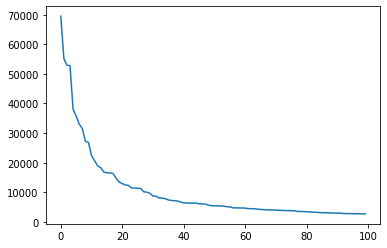

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline
first_100_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_100_freqs)
plt.show()

Закон Хипса -- обратная сторона закона Ципфа. Он описывает, что чем больше корпус, тем меньше новых слов добавляется с добавлением новых текстов. В какой-то момент корпус насыщается.

## Задание 1.

**Задание**: обучите три классификатора: 

1) на токенах с высокой частотой 

2) на токенах со средней частотой 

3) на токенах с низкой частотой

Сравните полученные результаты, оцените какие токены наиболее важные для классификации.

### Создадим корпус по тренировочным данным и отсортируем по частотам

In [218]:
corpus = [token for tweet in x_train for token in nltk.word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

2151990


['Через',
 'пару',
 'недель',
 'моя',
 '4-хмесячная',
 'командировка',
 'закончится',
 'и',
 'армия',
 'в']

In [219]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:10]

[('не', 52080),
 ('и', 41134),
 ('в', 39778),
 ('я', 39776),
 ('RT', 28582),
 ('на', 26705),
 ('http', 24697),
 ('что', 23785),
 ('с', 20439),
 ('а', 19993)]

### Получим частоты

In [220]:
freqs = [freq for word, freq in freq_dict_sorted]

### Найдем такие пороги, чтобы модели встречали одинаковое количество раз слова из своих словарей

In [221]:
sum_freqs = 0
flag_1 = True
for i in range(len(freqs)):
  sum_freqs+=freqs[i]
  if flag_1:
    if sum_freqs>=(sum(freqs)*1/3):
      threshold_token_1 = i
      flag_1 = False
  if sum_freqs>=(sum(freqs)*2/3):
    threshold_token_2 = i
    break
print(threshold_token_1)
print(threshold_token_2)

73
3072


### Посмторим на крайние токены

In [222]:
print(freq_dict_sorted[threshold_token_1])
print(freq_dict_sorted[threshold_token_2])

('Не', 2872)
('гэсэн', 57)


### Плучим слова

In [223]:
freq_sorted_words = [word for word, freq in freq_dict_sorted]

## 1) на токенах с высокой частотой

In [224]:
high_freq_tokens = freq_sorted_words[:threshold_token_1]
no_high_freq_tokens = freq_sorted_words[threshold_token_1:]

In [232]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize, stop_words=(no_high_freq_tokens+list(punctuation))) # лишние токены и пунктуацию поместим в стоп слова
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['+++лучше', '+17с', '+3k', '+3°с', '+k', '+wi-fi', '+и', '+к', '+лось=', '+не', '+никита', '+нормально', '+приняли', '+сонно', ',10а', '-10с', '-13ºс', '-20.да', '-25°с', '-3.сегодня', '-30°c', '-3°с', '-50с', '-6.вся', '-bullets', '-d', '-dd', '-ddddd', '-dвот', '-dдаа', '-dесли', '-dжалко', '-dне', '-dони', '-dппц', '-dразбила', '-dу', '-dумеет', '-dщас', '-dя', '-e', '-i', '-noize', '-o.o', '-o_o', '-r', '-s', '-sex', '-ааа', '-абитуриенты', '-агааа', '-ага…', '-айгуля', '-акий', '-александр', '-алиночка', '-алл', '-алё', '-антон', '-антох', '-ань', '-аня', '-арина', '-артем', '-артемка', '-артур', '-асгард', '-ах', '-аха', '-ахаа', '-ахахах', '-ахахахах', '-ахахахаха', '-ахахахахахахаха', '-ахахахаххахахахахахха', '-ахахаххахахахахах', '-ахахха', '-ахаххаххаххаха', '-басков', '-бася', '-б

              precision    recall  f1-score   support

    negative       0.66      0.63      0.65     29073
    positive       0.63      0.66      0.65     27636

    accuracy                           0.65     56709
   macro avg       0.65      0.65      0.65     56709
weighted avg       0.65      0.65      0.65     56709



## 2) на токенах со средней частотой

In [233]:
medium_freq_tokens = freq_sorted_words[threshold_token_1:threshold_token_2]
no_medium_freq_tokens = freq_sorted_words[:threshold_token_1]+freq_sorted_words[threshold_token_2:]

In [234]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize, stop_words=(no_medium_freq_tokens+list(punctuation))) # лишние токены и пунктуацию поместим в стоп слова
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['+++лучше', '+17с', '+3k', '+3°с', '+k', '+wi-fi', '+и', '+к', '+лось=', '+не', '+никита', '+нормально', '+приняли', '+сонно', ',10а', '-10с', '-13ºс', '-20.да', '-25°с', '-3.сегодня', '-30°c', '-3°с', '-50с', '-6.вся', '-bullets', '-d', '-dd', '-ddddd', '-dвот', '-dдаа', '-dесли', '-dжалко', '-dне', '-dони', '-dппц', '-dразбила', '-dу', '-dумеет', '-dщас', '-dя', '-e', '-i', '-noize', '-o.o', '-o_o', '-r', '-s', '-sex', '-ааа', '-абитуриенты', '-агааа', '-ага…', '-айгуля', '-акий', '-александр', '-алиночка', '-алл', '-алё', '-антон', '-антох', '-ань', '-аня', '-арина', '-артем', '-артемка', '-артур', '-асгард', '-ах', '-аха', '-ахаа', '-ахахах', '-ахахахах', '-ахахахаха', '-ахахахахахахаха', '-ахахахаххахахахахахха', '-ахахаххахахахахах', '-ахахха', '-ахаххаххаххаха', '-басков', '-бася', '-б

              precision    recall  f1-score   support

    negative       0.71      0.70      0.71     28206
    positive       0.71      0.72      0.71     28503

    accuracy                           0.71     56709
   macro avg       0.71      0.71      0.71     56709
weighted avg       0.71      0.71      0.71     56709



## 3) на токенах с низкой частотой

In [235]:
low_freq_tokens = freq_sorted_words[threshold_token_2:]
no_low_freq_tokens = freq_sorted_words[:threshold_token_2]

In [236]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize, stop_words=(no_low_freq_tokens+list(punctuation))) # лишние токены и пунктуацию поместим в стоп слова
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['-d', '-а', '-я', '//t.co/gmelsgmiuw', 'aizadolmatova', 'alex7236', 'apple', 'artem_klyushin', 'autofollowback', 'cio_optimal', 'creative_link', 'd', 'dd', 'ddd', 'dddd', 'direction', 'do_or_die_xxx', 'ff_ru', 'google', 'i', 'iphone', 'mars', 'o_o', 'one', 'p.s', 'podslyshano', 'prisonero_o', 'psykero1477', 'q', 'rt', 'ru_ff', 'seconds', 'sledui', 'teamfollowback', 'tukvasociopat', 'vrsoloviev', 'xd', 'xsimmka', 'андрей', 'антон', 'аня', 'взаимныйфолловинг', 'вика', 'волгоград', 'волгограде', 'волк', 'гарри', 'даша', 'дед', 'дима', 'дождались', 'егэ', 'женя', 'иван', 'катя', 'квн', 'киев', 'киеве', 'конституции', 'лена', 'луи', 'майдан', 'маша', 'молодежка', 'москва', 'москве', 'москву', 'москвы', 'настей', 'настя', 'никита', 'о_о', 'оля', 'официальный', 'питер', 'питере', 'предновогодниеобни

              precision    recall  f1-score   support

    negative       0.80      0.67      0.73     33141
    positive       0.63      0.77      0.69     23568

    accuracy                           0.71     56709
   macro avg       0.71      0.72      0.71     56709
weighted avg       0.73      0.71      0.71     56709



### Вывод:

1). В пером случае у нас маленький словарь и большинство слов, это шум, который не несёт большого смысла, типо предлогов

2). Метрики уже лучше, так же они пропорциональные

3). Усреднённые метрики так же неплохие, но видно, что класс positive предсказывается гораздо хуже negative, скорее всего, это потому, что как я предпологал, радость (positive) выражается более тривиально, поэтому частота у слов выражающих positive гораздо больше, чем у слов выражающих negative, а так как вы взяли только слова с низкой частотой, то и получили соответствующие метрики

## О важности эксплоративного анализа

Но иногда пунктуация бывает и не шумом -- главное отталкиваться от задачи. Что будет если вообще не убирать пунктуацию?

In [238]:
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     27764
    positive       1.00      1.00      1.00     28945

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709



Шок! Стоило оставить пунктуацию -- и все метрики равны 1. Как это получилось? Среди неё были очень значимые токены (как вы думаете, какие?). Найдите фичи с самыми большими коэффициэнтами:

## Задание 2.

найти фичи с наибольшей значимостью, и вывести их

### О том насколько влияют токены нам скажут их веса, чем они больше в абсолютном значении, тем большее влияние у токена

In [254]:
dict_coef = list(zip(clf.coef_[0], range(len(clf.coef_[0]))))
dict_coef[:5]

[(0.09389033214856206, 0),
 (0.3364937386835921, 1),
 (-0.08221587022643352, 2),
 (1.2595728158784607, 3),
 (-0.30097530496221675, 4)]

In [258]:
dict_coef_sorted = sorted(dict_coef, key=(lambda x: -abs(x[0])))
dict_coef_sorted[:5]

[(-59.5281318288173, 7),
 (58.53024830320905, 8),
 (27.070341336204894, 43280),
 (-11.229439991547963, 101098),
 (-10.792626496954874, 179444)]

In [265]:
list(vec.vocabulary_.items())[:5]

[('через', 251389),
 ('пару', 189219),
 ('недель', 175008),
 ('моя', 169250),
 ('4-хмесячная', 27731)]

In [266]:
vec_vocabulary_reverse = {y:x for x, y in vec.vocabulary_.items()}
list(vec_vocabulary_reverse.items())[:5]

[(251389, 'через'),
 (189219, 'пару'),
 (175008, 'недель'),
 (169250, 'моя'),
 (27731, '4-хмесячная')]

In [267]:
vocabulary_sorted = [vec_vocabulary_reverse[y] for x,y in dict_coef_sorted]
vocabulary_sorted[:10]

['(', ')', 'd', '|', 'о_о', 'dd', '^_^', '-/', 'o_o', 'ddd']

Посмотрим, как один из супер-значительных токенов справится с классификацией безо всякого машинного обучения:

In [269]:
cool_token = ')'
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      0.85      0.92     32797
    positive       0.83      1.00      0.91     23912

    accuracy                           0.91     56709
   macro avg       0.91      0.92      0.91     56709
weighted avg       0.93      0.91      0.91     56709



### Вывод:

В задаче Sentiment analysis огромную роль играют эмотиконы, а значит и символы(знаки пунктуации) из которых их часто состоявляют

## Символьные n-граммы

Теперь в качестве фичей используем, например, униграммы символов:

In [270]:
vec = CountVectorizer(analyzer='char', ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

    negative       0.99      1.00      0.99     27726
    positive       1.00      0.99      1.00     28983

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709



В общем-то, теперь уже понятно, почему на этих данных здесь 1. Так или инчае, на символах классифицировать тоже можно: для некторых задач (например, для определения языка) фичи-символьные n-граммы решительно рулят.

Ещё одна замечательная особенность фичей-символов: токенизация и лемматизация не нужна, можно использовать такой подход для языков, у которых нет готвых анализаторов.

## Задание 3.

###  1). сравнить count/tf-idf/hashing векторайзеры/полносвязанную сетку (построить classification_report)

CountVectorizer

In [271]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

    negative       0.80      0.76      0.78     29425
    positive       0.75      0.80      0.77     27284

    accuracy                           0.78     56709
   macro avg       0.78      0.78      0.78     56709
weighted avg       0.78      0.78      0.78     56709



TfidfVectorizer

In [272]:
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  % sorted(inconsistent)


              precision    recall  f1-score   support

    negative       0.77      0.77      0.77     27716
    positive       0.78      0.78      0.78     28993

    accuracy                           0.77     56709
   macro avg       0.77      0.77      0.77     56709
weighted avg       0.77      0.77      0.77     56709



HashingVectorizer

In [73]:
from sklearn.feature_extraction.text import HashingVectorizer

In [275]:
hashing_n_features = 100

In [276]:
vec = HashingVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize, stop_words=noise, n_features=hashing_n_features)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  % sorted(inconsistent)


              precision    recall  f1-score   support

    negative       0.62      0.59      0.60     29469
    positive       0.58      0.61      0.60     27240

    accuracy                           0.60     56709
   macro avg       0.60      0.60      0.60     56709
weighted avg       0.60      0.60      0.60     56709



Neural network

Предобработка данных:

In [16]:
corpus = [token for tweet in x_train for token in nltk.word_tokenize(tweet) if token not in noise]
corpus[:5]

['implosionss', 'общем', 'старый', 'хрыч', 'достал']

In [19]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:10]

[('RT', 28528),
 ('http', 24756),
 ('...', 16821),
 ('D', 12346),
 ('это', 12320),
 ("''", 9329),
 ('Я', 9258),
 ('``', 8608),
 ('..', 8557),
 ('А', 6526)]

In [20]:
vocabulary_size = len(freq_dict)
vocabulary_size

288731

In [21]:
VOCABULARY_SIZE = vocabulary_size
VOCABULARY_SIZE

288731

In [22]:
top_n_words = [word for word, freq in freq_dict_sorted[:VOCABULARY_SIZE]]
top_n_words[:5]

['RT', 'http', '...', 'D', 'это']

In [23]:
vocab = {y:x for x,y in enumerate(top_n_words, start=1)}
list(vocab.items())[:5]

[('RT', 1), ('http', 2), ('...', 3), ('D', 4), ('это', 5)]

In [24]:
x_train_nn = x_train.apply(lambda text: [vocab.get(word, 0) for word in nltk.word_tokenize(text) if word not in noise])
x_test_nn = x_test.apply(lambda text: [vocab.get(word, 0) for word in nltk.word_tokenize(text) if word not in noise])
x_train_nn[:5]

92851                   [31398, 619, 1222, 91629, 4626, 4]
30130                             [866, 59, 705, 5, 10547]
20580           [26068, 3, 12, 1059, 461, 3002, 325, 1409]
70331                  [333, 7609, 2555, 1954, 30, 5, 257]
37780    [3714, 430, 3047, 17354, 51, 26069, 40101, 364...
Name: text, dtype: object

In [25]:
max_len = x_train_nn.apply(lambda txt: len(txt)).max()
max_len

40

In [26]:
MAX_LEN = max_len
MAX_LEN

40

In [27]:
x_train_nn = x_train_nn.apply(lambda x: x+[0]*(MAX_LEN-len(x)))
x_test_nn = x_test_nn.apply(lambda x: x+[0]*(MAX_LEN-len(x)))
x_train_nn[:5]

92851    [31398, 619, 1222, 91629, 4626, 4, 0, 0, 0, 0,...
30130    [866, 59, 705, 5, 10547, 0, 0, 0, 0, 0, 0, 0, ...
20580    [26068, 3, 12, 1059, 461, 3002, 325, 1409, 0, ...
70331    [333, 7609, 2555, 1954, 30, 5, 257, 0, 0, 0, 0...
37780    [3714, 430, 3047, 17354, 51, 26069, 40101, 364...
Name: text, dtype: object

In [49]:
x_train_nn_array = np.array([j for j in [i for i in x_train_nn]])
x_test_nn_array = np.array([j for j in [i for i in x_test_nn]])
x_train_nn_array[0]

array([31398,   619,  1222, 91629,  4626,     4,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0])

In [32]:
y_train_nn = y_train.apply(lambda x: 1 if x=='positive' else 0)
y_test_nn = y_test.apply(lambda x: 1 if x=='positive' else 0)
y_train_nn[:5]

92851    1
30130    0
20580    0
70331    0
37780    1
Name: label, dtype: int64

Модель:

In [28]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalAveragePooling1D

In [41]:
embedding_dim = 32
hidden_dim = 16

In [79]:
model = Sequential([
    Embedding(VOCABULARY_SIZE+1, embedding_dim),
    GlobalAveragePooling1D(),
    Dense(hidden_dim, activation='relu'),
    Dense(1)
])

In [80]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Обучение

In [81]:
hh = model.fit(x_train_nn_array, y_train_nn, epochs=2, batch_size=128)

Epoch 1/2
1330/1330 [==============================] - 147s 110ms/step - loss: 0.5418 - accuracy: 0.6714
Epoch 2/2
1330/1330 [==============================] - 148s 111ms/step - loss: 0.3418 - accuracy: 0.8433


In [82]:
nn_preds = model.predict(x_test_nn_array)
nn_preds[:5]

array([[ 6.8784842 ],
       [ 7.07654   ],
       [-0.32616395],
       [-3.145768  ],
       [ 7.385683  ]], dtype=float32)

Так как классы сбалансированны, то порог можно взять 0.5

In [83]:
threshold = 0.5

In [84]:
nn_preds_bin = (nn_preds > threshold).astype(int)
nn_preds_bin[:5]

array([[1],
       [1],
       [0],
       [0],
       [1]])

In [85]:
print(classification_report(nn_preds_bin, y_test_nn))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79     31933
           1       0.71      0.82      0.76     24776

    accuracy                           0.77     56709
   macro avg       0.78      0.78      0.77     56709
weighted avg       0.78      0.77      0.78     56709



### Вывод:

Строить нейронную сеть и препроцессить для неё данные долго, еще дольше только подбирать параметры и обучать её, а результат даже чуть хуже, но это я её не слишком настраивал

HashingVectorizer быстрее остальных, но результаты хуже остальных, дальше буду подбирать количество признаков.

Результаты CountVectorizer и TfidfVectorizer почти одинаковые, но у TfidfVectorizer они более уравновешанные относительно классов. 

###  2). подобрать оптимальный размер для hashing векторайзера

In [86]:
import time

In [87]:
n_features = [100, 1000, 10000]

In [88]:
for features in n_features:
  start_time = time.time()
  vec = HashingVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize, stop_words=noise, n_features=features)
  bow = vec.fit_transform(x_train)
  clf = LogisticRegression(random_state=42)
  clf.fit(bow, y_train)
  pred = clf.predict(vec.transform(x_test))
  acc = (pred == y_test).sum() / len(y_test)
  print(f'n_features: {features}; acc: {acc}; time: {time.time()-start_time}')

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  % sorted(inconsistent)


KeyboardInterrupt: ignored

### Вывод:

Чем больше мы возьмём параметров, тем лучше результат, но тем дольше обучается модель, но разница по метрикам между n_features = 1000 и n_features = 10000 небольшая, а вот по времени достаточно

###  3). убедиться что для сетки нет переобучения

Так как метрика на train меньше чем метрика на test, то переобучения нету.

## Домашнее задание

все материалы для выполения дз в `sem2.ipynb`


### Задание 1.

**Задание**: обучите три классификатора: 

1) на токенах с высокой частотой 

2) на токенах со средней частотой 

3) на токенах с низкой частотой


Сравните полученные результаты, оцените какие токены наиболее важные для классификации.


### Задание 2.

найти фичи с наибольшей значимостью, и вывести их


### Задание 3.

1) сравнить count/tf-idf/hashing векторайзеры/полносвязанную сетку (построить classification_report)

2) подобрать оптимальный размер для hashing векторайзера 

3) убедиться что для сетки нет переобучения

### Решение ДЗ выше 